In [19]:
import pandas as pd
import datetime
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
from tabulate import tabulate
import datetime as dt

In [20]:
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
death_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
us_confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
us_death_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
timestr = time.strftime("%Y%m%d-%H%M%S")

In [21]:
def get_n_melt_data(data_url, case_type):
    df = pd.read_csv(data_url)
    reshape_df = df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"])
    reshape_df.rename(columns={"variable": "Date", "value": case_type}, inplace=True)
    return reshape_df

def merge_data(confirmed, recovered, deaths):
    new_df = confirmed.join(recovered["Recovered"]).join(deaths["Deaths"])
    return new_df

def fetch_data():
    confirm_df = get_n_melt_data(confirmed_cases_url, "Confirmed")
    recovered_df = get_n_melt_data(recovered_cases_url, "Recovered")
    deaths_df = get_n_melt_data(death_cases_url, "Deaths")
    print("Getting and Reshaping Data")
    df = merge_data(confirm_df, recovered_df, deaths_df)
    print("Preview")
    print(df.tail(5))
    #filename= "covid19_dataset_{}.csv".format(timestr)
    filename= "./covid19_dataset.csv"
    print("Saving Data as {}".format(filename))
    df.to_csv(filename)
    print("Done")

fetch_data()



Getting and Reshaping Data
Preview
                    Province/State         Country/Region       Lat  \
20772  Falkland Islands (Malvinas)         United Kingdom -51.79630   
20773    Saint Pierre and Miquelon                 France  46.88520   
20774                          NaN            South Sudan   6.87700   
20775                          NaN         Western Sahara  24.21550   
20776                          NaN  Sao Tome and Principe   0.18636   

            Long    Date  Confirmed  Recovered  Deaths  
20772 -59.523600  4/9/20          5        NaN       0  
20773 -56.315900  4/9/20          1        NaN       0  
20774  31.307000  4/9/20          3        NaN       0  
20775 -12.885800  4/9/20          4        NaN       0  
20776   6.613081  4/9/20          4        NaN       0  
Saving Data as ./covid19_dataset.csv
Done


In [22]:
 filename= "./covid19_dataset.csv"
 df = pd.read_csv(filename)
 df.rename(columns={df.columns[0]: 'Index','Province/State': 'Province_State', 'Country/Region': 'Country_Region'}, inplace=True)

In [23]:
df = df[['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Recovered', 'Deaths']]

In [24]:
df_per_day = df.groupby('Date')['Confirmed', 'Recovered', 'Deaths'].max()

In [25]:
# Max No of Cases Confirmed
df_per_day['Confirmed'].max()


461437

In [26]:
# Min No of Cases Confirmed
df_per_day['Confirmed'].min()


444

In [27]:
# Number of Cases Per Country
max_cases_per_country = df.groupby(['Country_Region'])['Confirmed', 'Recovered', 'Deaths'].max()
table_max_cases = max_cases_per_country.sort_values(by=['Confirmed'], ascending=False)
print("Max number of cases per country")
print(tabulate(table_max_cases,headers='keys'))
table_max_cases.plot(kind='bar', figsize=(20,10))
plt.savefig("figure/global/Bar Graph Per Country.png")

Max number of cases per country
Country_Region                      Confirmed    Recovered    Deaths
--------------------------------  -----------  -----------  --------
US                                     461437          401     16478
Spain                                  153222        40437     15447
Italy                                  143626         1359     18279
Germany                                118181         3794      2607
France                                 117749        63471     12210
China                                   67803        64014      3215
Iran                                    66220        22837      4110
United Kingdom                          65077        60811      7978
Turkey                                  42282        21763       908
Belgium                                 24983         1669      2523
Switzerland                             24051         8056       948
Netherlands                             21762        62570      2396
Br

FileNotFoundError: [Errno 2] No such file or directory: 'figure/global/Bar Graph Per Country.png'

In [28]:
#Countries Affected
countries_affected = df['Country_Region'].unique()
print(countries_affected)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, South' 'Kuwait'
 'Kyrgyzstan' 'Latvia' 'Lebanon' 'L

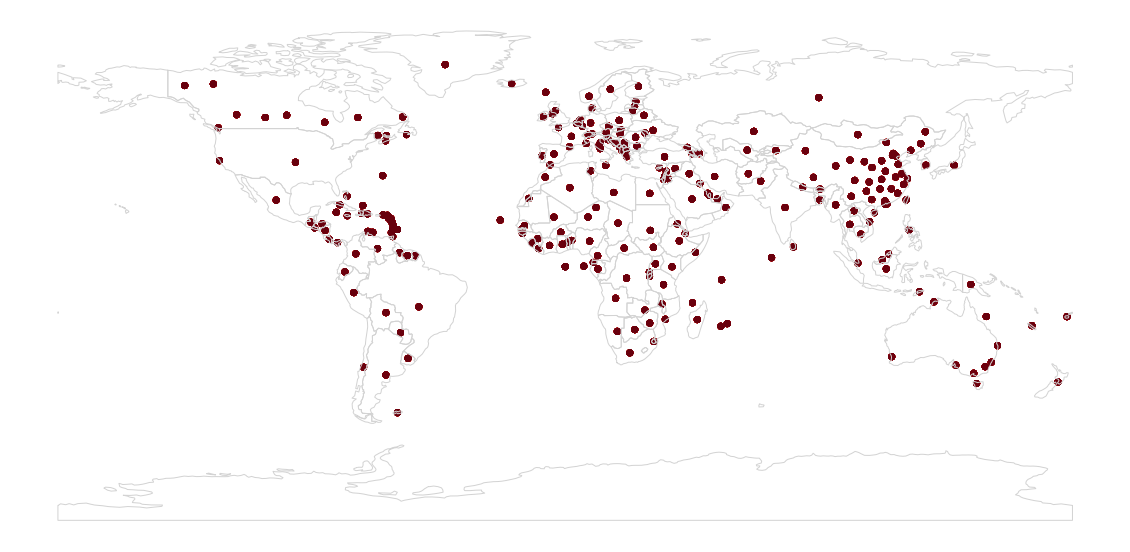

In [29]:
# Convert to geodataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Long'], df['Lat']))
world = world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
fig,ax = plt.subplots(figsize=(20,10))
ax.axis('off')
gdf.plot(cmap="Reds", ax=ax)
world.geometry.boundary.plot(color='lightgrey', edgecolor="black", linewidth=1, ax=ax)
plt.savefig("figures/global/Cases Per Country.png")


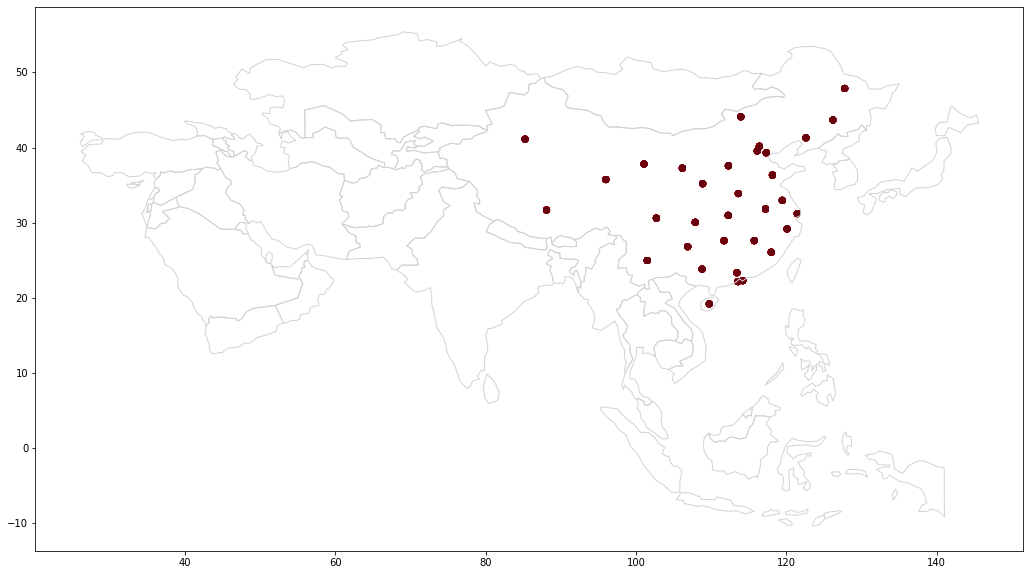

In [30]:
#only china
asia = world[world['continent']  == 'Asia']
fig,ax = plt.subplots(figsize=(20,10))
gdf[gdf['Country_Region'] == 'China'].plot(cmap="Reds", ax=ax)
asia.geometry.boundary.plot(color="lightgrey", edgecolor="black", linewidth=1, ax=ax)
plt.savefig("figures/global/China.png")

In [31]:
df.head()

Province_State Country_Region      Lat     Long     Date  Confirmed  \
0            NaN    Afghanistan  33.0000  65.0000  1/22/20          0   
1            NaN        Albania  41.1533  20.1683  1/22/20          0   
2            NaN        Algeria  28.0339   1.6596  1/22/20          0   
3            NaN        Andorra  42.5063   1.5218  1/22/20          0   
4            NaN         Angola -11.2027  17.8739  1/22/20          0   

   Recovered  Deaths                    geometry  
0        0.0       0   POINT (65.00000 33.00000)  
1        0.0       0   POINT (20.16830 41.15330)  
2        0.0       0    POINT (1.65960 28.03390)  
3        0.0       0    POINT (1.52180 42.50630)  
4        0.0       0  POINT (17.87390 -11.20270)

In [32]:
df2 = df
df.to_csv("covid19_dataset_clean.csv")
df['cases_dates'] =  pd.to_datetime(df2['Date'])

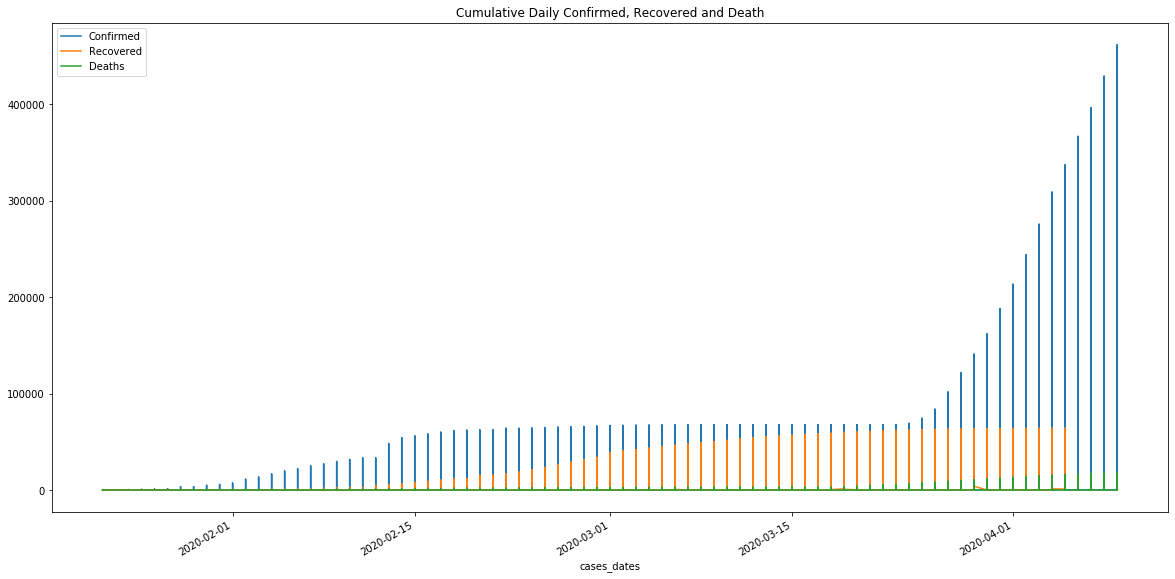

In [33]:
df2.set_index('cases_dates')[['Confirmed','Recovered','Deaths']].plot(figsize=(20,10))
plt.title('Cumulative Daily Confirmed, Recovered and Death')
plt.savefig("figures/global/Cumulative Daily Confirmed, Recovered and Death.png")

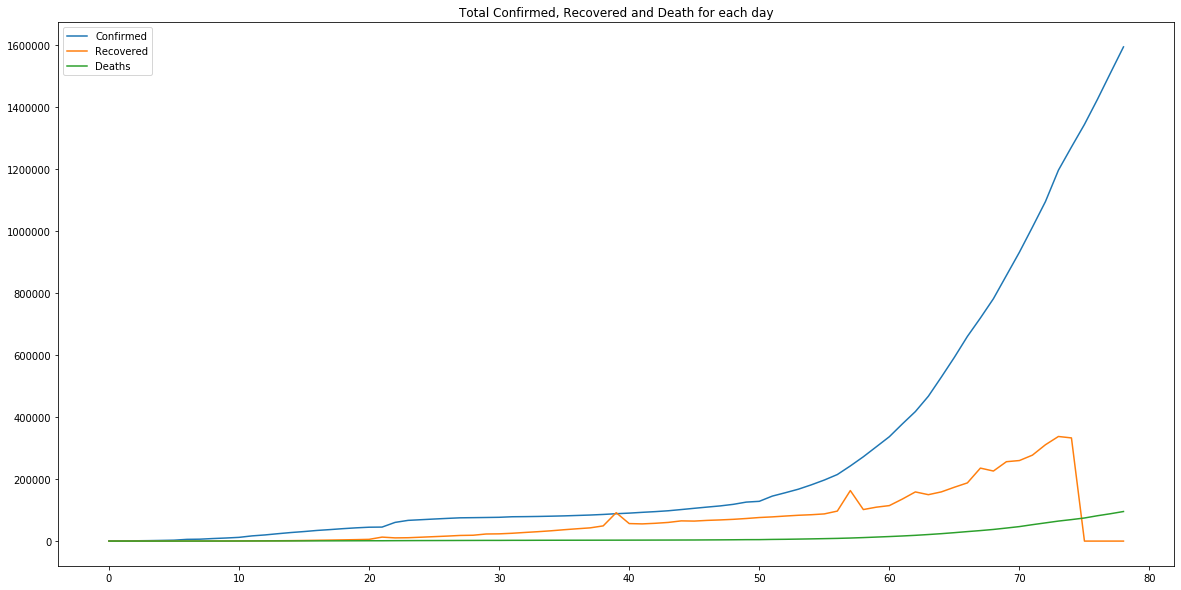

In [34]:
df_by_date = df2.set_index('cases_dates').groupby(['cases_dates']).sum().reset_index(drop=None)
df_by_date[['Confirmed', 'Recovered', 'Deaths']].plot(kind='line', figsize=(20,10))
plt.title('Total Confirmed, Recovered and Death for each day')
plt.savefig('figures/global/Total Confirmed, Recovered and Death for each day.png')

In [35]:
df_by_date = df_by_date.set_index('cases_dates')


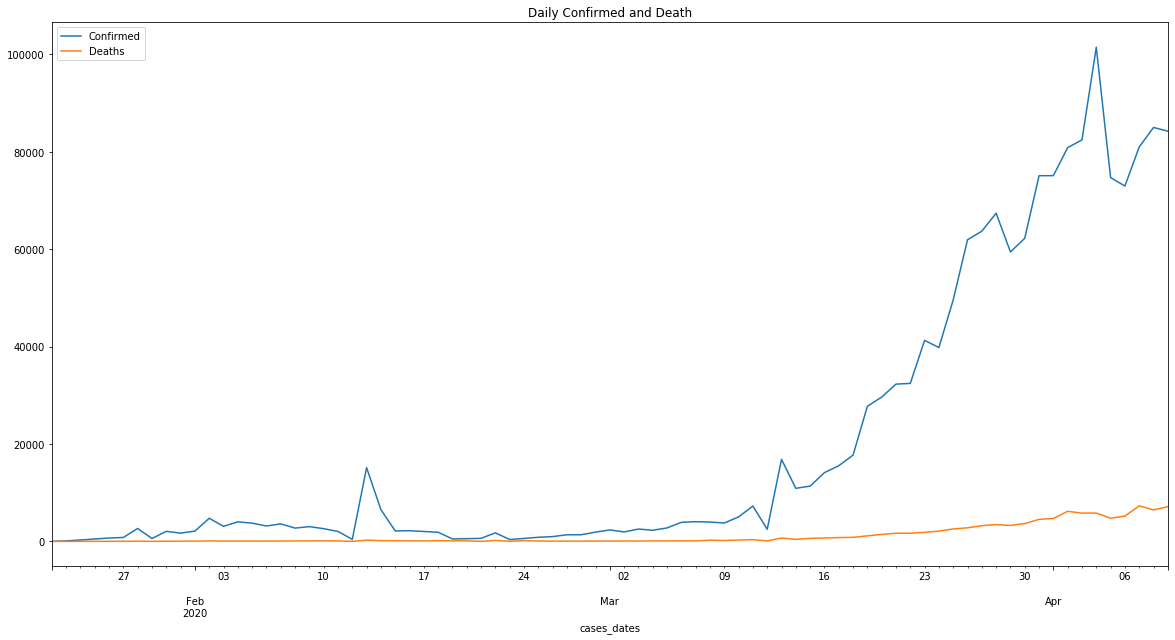

In [36]:
df_by_date[['Confirmed', 'Recovered','Deaths']].to_csv("cumulative_daily_cases.csv")
daily_cases = df_by_date[['Confirmed', 'Deaths']]
diff = daily_cases.diff().fillna(0).plot(kind='line', figsize=(20,10))
plt.title("Daily Confirmed and Death")
plt.savefig("figures/global/Daily Confirmed and Death.png")